In [96]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import yfinance as yf 
import statsmodels.api as sm
import statsmodels as sms

%matplotlib inline

In [97]:
#Import $AMC price data from yfinance and save it as a variable, import data back to July 2020

amc = yf.download('AMC', "2020-07-01", "2021-06-25", parse_dates=True, index_col='date')
amc

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-01,4.260000,4.600000,4.260000,4.570000,4.570000,4914500
2020-07-02,4.690000,4.690000,4.470000,4.530000,4.530000,3908400
2020-07-06,4.620000,4.640000,4.130000,4.280000,4.280000,5489700
2020-07-07,4.180000,4.290000,4.080000,4.130000,4.130000,2667600
2020-07-08,4.490000,4.520000,4.200000,4.430000,4.430000,5586800
...,...,...,...,...,...,...
2021-06-18,61.259998,64.959999,56.849998,59.259998,59.259998,242896900
2021-06-21,61.340000,63.009998,53.430000,55.689999,55.689999,185876100
2021-06-22,54.099998,58.740002,51.049999,58.270000,58.270000,169494100


<AxesSubplot:xlabel='Date'>

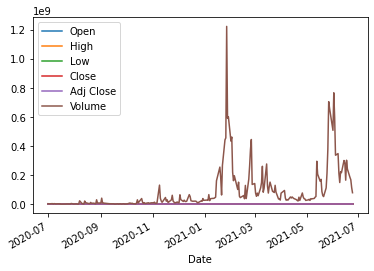

In [98]:
#Plot the adjusted close of AMC

amc.plot()

In [99]:
#Import TrendReq from pytrends to pull google trends data. If you don't have pytrends downloaded -- pip install pytrends

from pytrends.request import TrendReq
pytrends = TrendReq()

In [100]:
#Import AMC interest overtime from google trends using pytrends

kw_list = ['AMC']

pytrends.build_payload(kw_list, timeframe='today 12-m')
pytrends

In [101]:
#Use the .interest_over_time() function to extract the google trends data as a dataframe. Save to a variable 
amc_gt = pytrends.interest_over_time()
amc_gt['AMC'] = pytrends.interest_over_time()
amc_gt.drop(columns='isPartial')

,AMC
date,
2020-06-28,6
2020-07-05,5
2020-07-12,5
2020-07-19,6
2020-07-26,6
2020-08-02,6
2020-08-09,9
2020-08-16,11
2020-08-23,9


<AxesSubplot:xlabel='Date'>

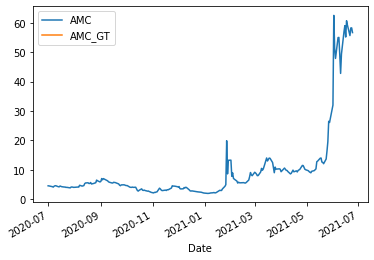

In [102]:
data2 = pd.DataFrame()
data2['AMC'] = amc['Adj Close']
data2['AMC_GT']= amc_gt['AMC']
data2.plot()

Text(0.5, 1.0, 'AMC Adj Close & Google Trends Interest Overtime')

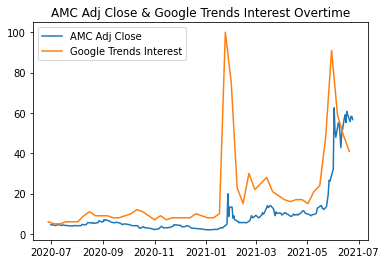

In [103]:
#Plot the AMC adjusted price along with the google trends interest overtime 

plt.plot(amc['Adj Close'], label = 'AMC Adj Close')
plt.plot(amc_gt['AMC'], label = 'Google Trends Interest')
plt.legend(loc='upper left')
plt.title('AMC Adj Close & Google Trends Interest Overtime')

In [104]:
#Import correlation functions from statsmodels library 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

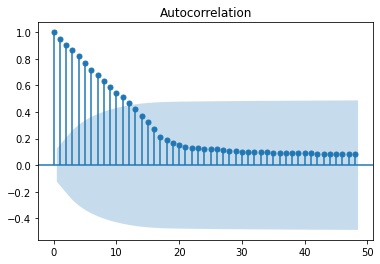

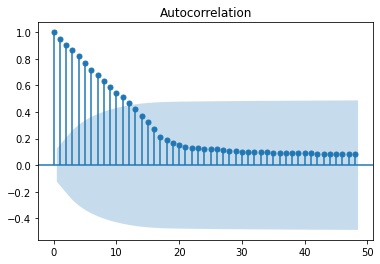

In [105]:
# Plot the auto correlation of AMC Adjusted Close Prices. Autocorrelation, also known as serial correlation,
# refers to the degree of correlation of the same variables between two successive time intervals.

plot_acf(amc['Adj Close'], lags = 48)

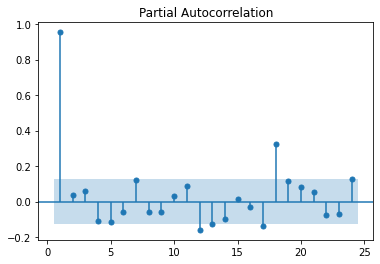

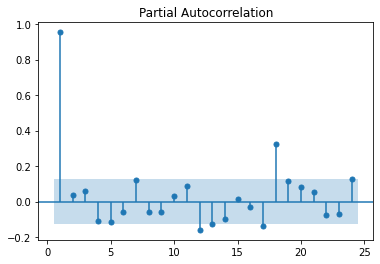

In [106]:
#Plot the partial autocorrelation of AMC Adj Close Prices. 

sms.graphics.tsaplots.plot_pacf(amc['Adj Close'], lags = 24, zero = False)

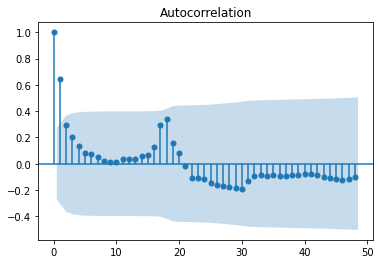

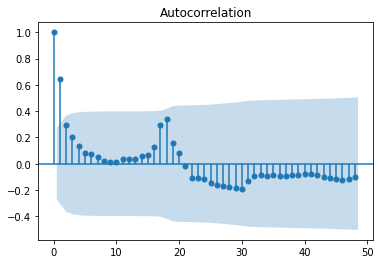

In [107]:
# Plot the auto correlation of AMC Google Trends 

plot_acf(amc_gt['AMC'], lags = 48)

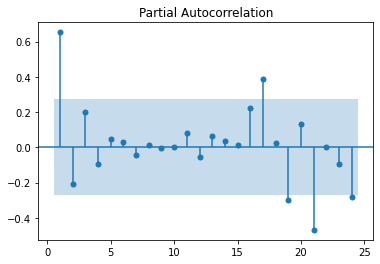

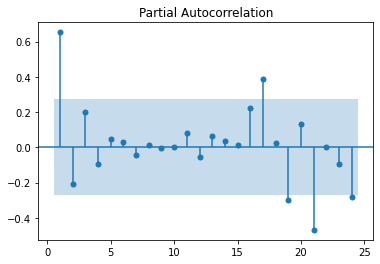

In [108]:
#Plot the partial autocorrelation of google trends interest 

sms.graphics.tsaplots.plot_pacf(amc_gt['AMC'], lags = 24, zero = False)

<AxesSubplot:xlabel='Date'>

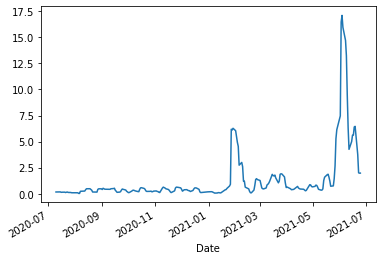

In [109]:
#Plot a rolling 7-dat standard deviation of TSLA's closing prices 

amc['Adj Close'].rolling(window=7).std().plot()

<AxesSubplot:xlabel='Date'>

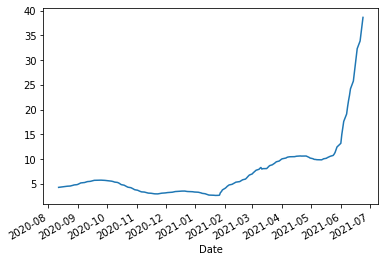

In [110]:
#Plot a rolling 30-day mean of AMC's adjusted close price 

amc['Adj Close'].rolling(window=30).mean().plot()

In [116]:
# Import statsmodel library to run ARIMA preditions. ARIMA uses the auto correlation and moving averages to look for correlated datapoints within a dataframe. ARIMA makes the data stationary so you 
# will not have to convert it from non stationary.

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(amc['Close'], order = (2,1,2))
results = model.fit()
results.summary()

C:\Users\Luke\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Luke\anaconda3\envs\pyvizenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it h

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  247
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -583.639
Method:                       css-mle   S.D. of innovations              2.565
Date:                Sat, 26 Jun 2021   AIC                           1179.279
Time:                        16:55:36   BIC                           1200.335
Sample:                             1   HQIC                          1187.756
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2159      0.149      1.446      0.148      -0.077       0.509
ar.L1.D.Close     0.4554      0.102      4.468      0.000       0.256       0.655
ar.L2.D.Close    -0.6605      0.072     -9.120      0.000      -0.802      -0.519
ma.L1.D.Close    -0.7566      0.080     -9.511      0.000      -0.913      -0.601
ma.L2.D.Close     0.8597      0.053     16.252      0.000       0.756       0.963
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.3447           -1.1812j            1.2304           -0.2048
AR.2            0.3447           +1.1812j            1.2304            0.2048
MA.1            0.4401           -0.9847j            1.0785           -0.1831
MA.2            0.4401           +0.9847j            1.0785            0.1831
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'AMC returns forecast'}>

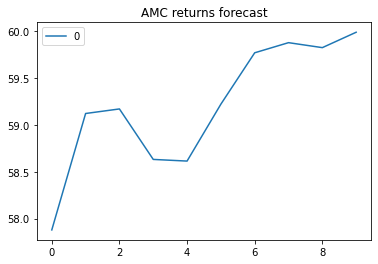

In [117]:
# Plot a forecast of the AMC adj closed on the next 10 days based on the past prices of AMC

pd.DataFrame(results.forecast(steps = 10)[0]).plot(title = 'AMC returns forecast')

In [118]:
# Run an analysis on the volume of AMC

In [119]:
amc_vol = pd.DataFrame(yf.download('AMC', "2020-07-01", "2021-06-25", parse_dates=True, index_col='date'))

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:title={'center':'% Change of AMC'}, xlabel='Date'>

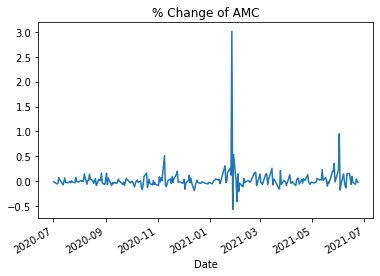

In [121]:
#Plot the percentage change of AMC overtime

amc_vol['Close'].pct_change().plot(title = '% Change of AMC')

In [122]:
# Structure data for GARCH model

returns = amc_vol.loc['2020':'2021'].Close.pct_change()*100
returns = returns.dropna()
returns

Date
2020-07-02   -0.875273
2020-07-06   -5.518764
2020-07-07   -3.504675
2020-07-08    7.263915
2020-07-09    3.160279
                ...   
2021-06-18   -2.420552
2021-06-21   -6.024299
2021-06-22    4.632792
2021-06-23    0.051482
2021-06-24   -2.744423
Name: Close, Length: 247, dtype: float64

In [123]:
# Use the GARCH model from statsmodels to give prediction on the volume for the next 10 trading days. The p and q paramaters are the lag time for the Auto Regression and Moving Average  

from arch import arch_model 
model = arch_model(returns, mean = 'Zero', vol='GARCH', p=1, q=1)

In [124]:
results = model.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 1161.5747023439235
Iteration:      2,   Func. Count:     10,   Neg. LLF: 1055.292230691428
Iteration:      3,   Func. Count:     14,   Neg. LLF: 1162.067906715684
Iteration:      4,   Func. Count:     19,   Neg. LLF: 1055.0040917493461
Iteration:      5,   Func. Count:     23,   Neg. LLF: 1054.9951246332041
Iteration:      6,   Func. Count:     27,   Neg. LLF: 1054.945645996637
Iteration:      7,   Func. Count:     31,   Neg. LLF: 1054.7339423599487
Iteration:      8,   Func. Count:     35,   Neg. LLF: 1054.5439332784322
Iteration:      9,   Func. Count:     39,   Neg. LLF: 1054.4885657770221
Iteration:     10,   Func. Count:     43,   Neg. LLF: 1054.4845683181902
Iteration:     11,   Func. Count:     47,   Neg. LLF: 1054.484514090023
Iteration:     12,   Func. Count:     50,   Neg. LLF: 1054.4845119263807
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1054.484514090023
            Iteratio

In [125]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.004
Vol Model:                      GARCH   Log-Likelihood:               -1054.48
Distribution:                  Normal   AIC:                           2114.97
Method:            Maximum Likelihood   BIC:                           2125.50
                                        No. Observations:                  247
Date:                Sat, Jun 26 2021   Df Residuals:                      247
Time:                        16:55:51   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         41.6001    101.582      0.410      0.682 [-1.575e+02,2.407e+02]
alpha[1]       0.5348      0.262      2.040  4.136e-02    [2.096e-02,  1.049]
beta[1]        0.4652      0.450      1.034      0.301      [ -0.416,  1.347]
=============================================================================

Covariance estimator: robust
"""

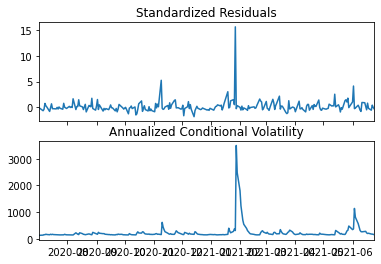

In [126]:
# Use the GARCH model to plot the Standardized Residuals and Annualized Conditional Volatility 

fig = results.plot(annualize = 'D')

In [127]:
#Find the last day in the dataset

last_day = amc_vol.index.max().strftime('%Y-%m-%d')
last_day

'2021-06-24'

In [128]:
# Make a forecast of the future volatility of AMC over the next 10 days using the GARCH model 

forecast_horizon = 10 

forecasts = results.forecast(start = "2021-06-24", horizon = forecast_horizon)

C:\Users\Luke\anaconda3\envs\pyvizenv\lib\site-packages\arch\__future__\_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


In [129]:
# Annualize the forecast 

inter = np.sqrt(forecasts.variance.dropna() * 252)
inter

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10
Date,,,,,,,,,,
2021-06-24,149.195613,180.949077,207.908166,231.752115,253.361955,273.268216,291.81973,309.260396,325.768675,341.47982


In [130]:
# Transpose the forecast so that it is easier to plot
final = inter.dropna().T
final.head()

Date,2021-06-24
h.01,149.195613
h.02,180.949077
h.03,207.908166
h.04,231.752115
h.05,253.361955


<AxesSubplot:title={'center':'GARCH Volume Forecast over the next 10 Trading Days'}>

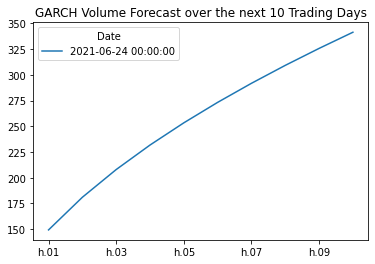

In [131]:
final.plot(title = 'GARCH Volume Forecast over the next 10 Trading Days')